In [12]:
## Set the directory to plot
path = 'run_tanh2_longer'+'/'

M_p = 2.435e18
M = 10 * M_p
lam = 1.77e16
omega_star = lam**2/M**2
# it looks like we can't get f_star from the information in the technical  note (g not given), which might be why they only plot the program power spectrum.

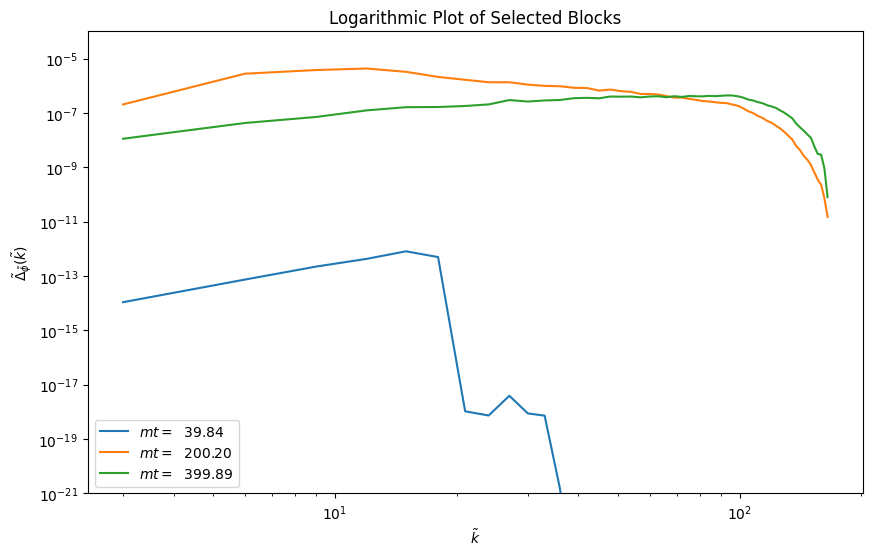

In [13]:
import matplotlib.pyplot as plt

# File paths to your data files
file_path = path + 'spectra_scalar_0.txt'
time_file_path = path + 'average_spectra_times.txt'

# Function to read blocks from the data file
def read_blocks(file_path):
    with open(file_path, 'r') as f:
        blocks = f.read().strip().split("\n\n")
    return [block.strip() for block in blocks]

# Function to read the times from the time file
def read_times(time_file_path):
    with open(time_file_path, 'r') as f:
        times = [float(line.strip()) for line in f.readlines()]
    return times

# Extract all blocks and times
blocks = read_blocks(file_path)
times = read_times(time_file_path)

# Function to process a block into columns (x, y1, y2, y3)
def process_block(block):
    data = [list(map(float, line.split())) for line in block.split("\n")]
    return list(zip(*data))  # Transpose to columns

# Indices of the blocks to plot
indices_to_plot = [80, int(len(blocks)/2), len(blocks)-1]  # First, middle, and last

# Create a figure
plt.figure(figsize=(10, 6))

# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    plt.plot(x, y1, label=f'$mt =$  {times[idx]:.2f}')  # Use time as label

# Customize plot
plt.xlabel(r'$\tilde{k}$')
plt.ylabel(r'$\tilde{\Delta}_\tilde{\phi}(\tilde{k})$')
plt.title('Logarithmic Plot of Selected Blocks')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-21,1e-4)
# Show legend
plt.legend()

# Show the plot
plt.show()

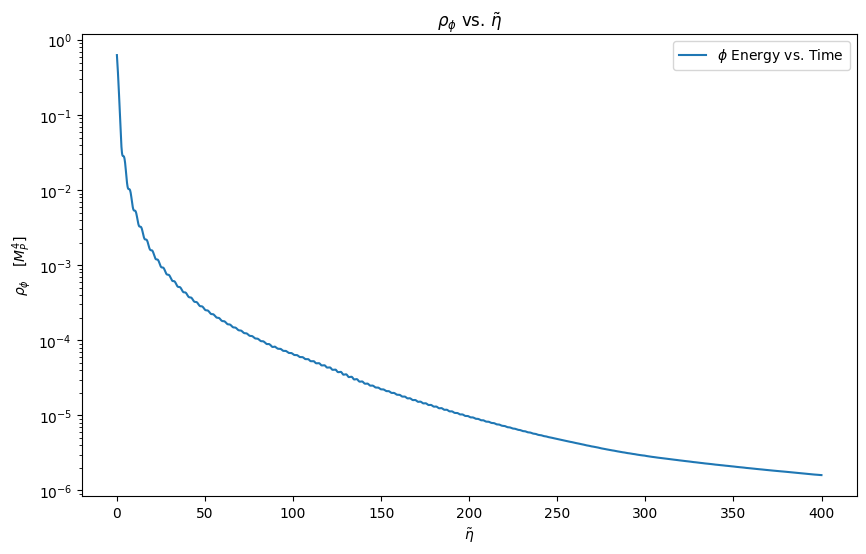

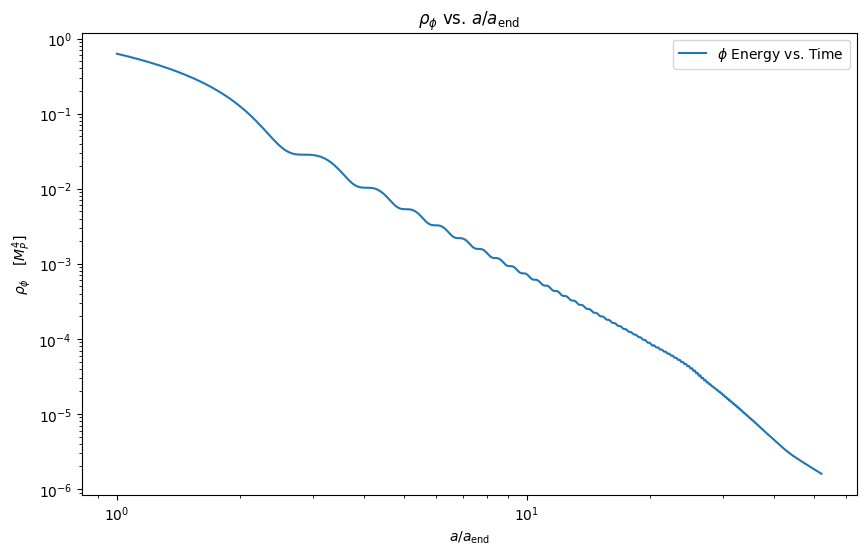

In [14]:
## Volume averaged energy density

import matplotlib.pyplot as plt

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
avg_energies = read_and_process_file(path + 'average_energies.txt')
avg_sf = read_and_process_file(path + 'average_scale_factor.txt')

# Assuming the first column is x and the second column is y
x = avg_energies[0]  # First column (x)
y = [sum(x) for x in zip(avg_energies[1], avg_energies[2], avg_energies[5])]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\rho_\phi\quad [M_P^4]$')
plt.title(r'$\rho_\phi$ vs. $\tilde{\eta}$')
plt.legend()
plt.yscale('log')
# Show the plot
plt.show()

# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\phi\quad [M_P^4]$')
plt.title(r'$\rho_\phi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

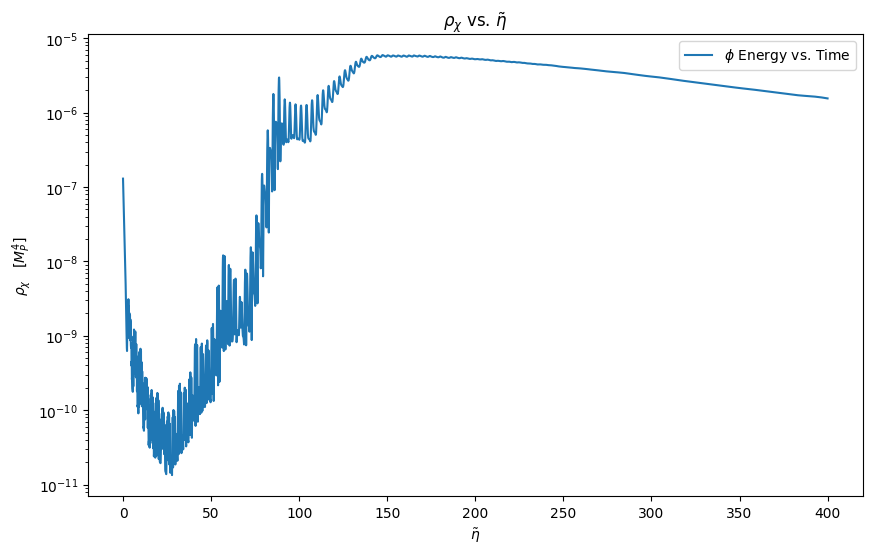

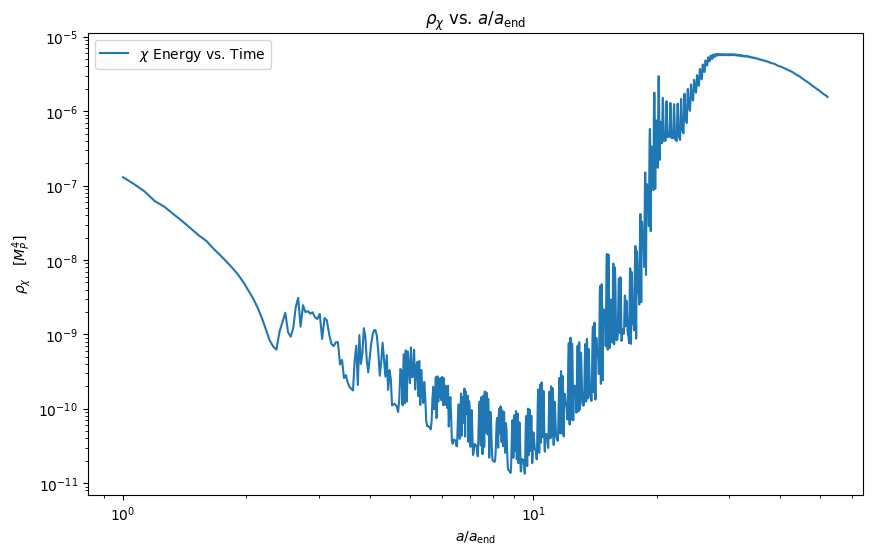

In [22]:
import matplotlib.pyplot as plt

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
avg_energies = read_and_process_file(path + 'average_energies.txt')
avg_sf = read_and_process_file(path + 'average_scale_factor.txt')

# Assuming the first column is x and the second column is y
x = avg_energies[0]  # First column (x)
y = [sum(x) for x in zip(avg_energies[3], avg_energies[4])]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $\tilde{\eta}$')
plt.legend()
plt.yscale('log')
# Show the plot
plt.show()

# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\chi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

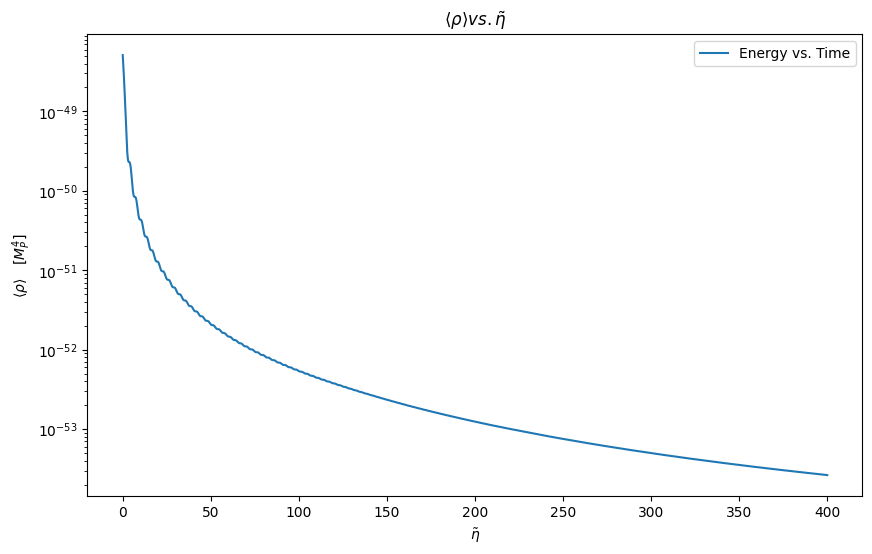

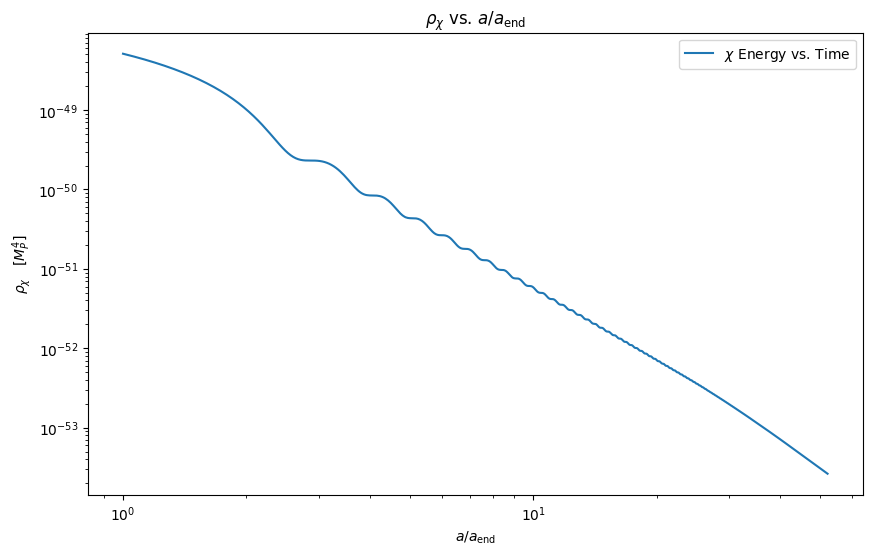

In [5]:
## Dimensionless program energy

import matplotlib.pyplot as plt

# File path to your data file
file_path = 'average_energies.txt'

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
data = read_and_process_file(path + file_path)

# Assuming the first column is x and the second column is y
x = data[0]  # First column (x)
y = [d * (f_star * omega_star / M_p**2)**2 for d in data[7]] # Second column (y)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\langle\rho\rangle\quad [M_P^4]$')
plt.title(r'$\langle\rho\rangle vs. \tilde{\eta}$')
plt.legend()
plt.yscale('log')
plt.show()


# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\chi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()